# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
train = pd.read_csv("data/train_set.csv", parse_dates=[2])
tube = pd.read_csv("data/tube.csv")
bom = pd.read_csv("data/bill_of_materials.csv")
specs = pd.read_csv("data/specs.csv")

In [3]:
train.head().append(train.tail())

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561
30208,TA-21190,S-0041,2013-09-10,869,75,No,75,5.945260
30209,TA-21191,S-0041,2013-09-10,752,1,No,1,6.131658
30210,TA-21195,S-0041,2013-08-05,1,80,No,80,5.066130
30211,TA-21196,S-0062,2005-05-09,422,1,No,1,18.214141
30212,TA-21197,S-0026,2009-07-30,3,1,No,1,53.618624


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30213 entries, 0 to 30212
Data columns (total 8 columns):
tube_assembly_id      30213 non-null object
supplier              30213 non-null object
quote_date            30213 non-null datetime64[ns]
annual_usage          30213 non-null int64
min_order_quantity    30213 non-null int64
bracket_pricing       30213 non-null object
quantity              30213 non-null int64
cost                  30213 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 1.8+ MB


In [5]:
train.describe()

,annual_usage,min_order_quantity,quantity,cost
count,30213.000000,30213.000000,30213.000000,30213.000000
mean,120.369377,2.084699,38.389369,13.433317
std,1590.331872,12.742776,70.761392,28.663200
min,0.000000,0.000000,1.000000,0.503553
25%,0.000000,0.000000,2.000000,3.878190
50%,0.000000,0.000000,10.000000,6.521146
75%,2.000000,0.000000,40.000000,13.431781
max,150000.000000,535.000000,2500.000000,1000.000000


In [6]:
tube.head().append(tube.tail())

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164.0,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127.0,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0
21193,TA-21195,SP-0029,25.40,1.65,86.0,2,38.10,N,N,N,N,EF-003,EF-009,0,0,0
21194,TA-21196,SP-0029,34.92,1.65,49.0,2,50.80,Y,Y,N,N,EF-003,EF-017,0,0,0
21195,TA-21197,SP-0029,34.92,1.65,18.0,1,50.80,Y,Y,N,N,EF-003,EF-017,0,0,0
21196,TA-21198,SP-0029,101.60,1.65,63.0,2,101.60,N,Y,N,Y,EF-009,EF-009,0,0,0
21197,TA-21199,SP-0029,101.60,1.65,124.0,3,101.60,N,Y,N,Y,EF-009,EF-009,0,0,0


In [7]:
print(tube.info())
print(tube.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21198 entries, 0 to 21197
Data columns (total 16 columns):
tube_assembly_id    21198 non-null object
material_id         20919 non-null object
diameter            21198 non-null float64
wall                21198 non-null float64
length              21198 non-null float64
num_bends           21198 non-null int64
bend_radius         21198 non-null float64
end_a_1x            21198 non-null object
end_a_2x            21198 non-null object
end_x_1x            21198 non-null object
end_x_2x            21198 non-null object
end_a               21198 non-null object
end_x               21198 non-null object
num_boss            21198 non-null int64
num_bracket         21198 non-null int64
other               21198 non-null int64
dtypes: float64(4), int64(4), object(8)
memory usage: 2.6+ MB
None
           diameter          wall        length     num_bends   bend_radius  \
count  21198.000000  21198.000000  21198.000000  21198.000000  21198.0000

In [8]:
tube[tube.material_id.isnull()]

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
1701,TA-01702,NaN,17.48,2.41,115.0,3,63.50,N,N,N,N,NONE,NONE,0,0,0
2003,TA-02004,NaN,17.30,2.30,30.0,0,0.00,Y,Y,Y,Y,EF-023,NONE,0,0,2
3359,TA-03360,NaN,19.05,2.11,151.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0
3895,TA-03896,NaN,6.35,2.26,34.0,4,25.40,N,N,N,N,EF-015,EF-015,0,0,0
4011,TA-04012,NaN,15.88,1.65,182.0,10,38.10,N,N,N,N,EF-003,EF-003,0,0,0
4012,TA-04013,NaN,15.88,1.65,188.0,9,38.10,N,N,N,N,EF-003,EF-003,0,0,0
4013,TA-04014,NaN,15.88,1.65,190.0,7,31.75,N,N,N,N,EF-003,EF-003,0,0,0
4014,TA-04015,NaN,15.88,1.65,181.0,7,31.75,N,N,N,N,EF-003,EF-003,0,0,0
4025,TA-04026,NaN,15.88,1.65,43.0,4,38.10,N,N,N,N,EF-003,EF-003,0,0,0
4026,TA-04027,NaN,15.88,1.65,50.0,2,38.10,N,N,N,N,EF-003,EF-003,0,0,0


We noticed that there are 279 NaN values in material_id, and also some None values in end_a and end_x columns

In [9]:
bom.head().append(bom.tail())

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21193,TA-21195,C-1373,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21194,TA-21196,C-1364,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21195,TA-21197,C-1733,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21196,TA-21198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21197,TA-21199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(bom.info())
print(bom.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21198 entries, 0 to 21197
Data columns (total 17 columns):
tube_assembly_id    21198 non-null object
component_id_1      19149 non-null object
quantity_1          19149 non-null float64
component_id_2      14786 non-null object
quantity_2          14786 non-null float64
component_id_3      4791 non-null object
quantity_3          4798 non-null float64
component_id_4      607 non-null object
quantity_4          608 non-null float64
component_id_5      92 non-null object
quantity_5          92 non-null float64
component_id_6      26 non-null object
quantity_6          26 non-null float64
component_id_7      7 non-null object
quantity_7          7 non-null float64
component_id_8      1 non-null object
quantity_8          1 non-null float64
dtypes: float64(8), object(9)
memory usage: 2.7+ MB
None
         quantity_1    quantity_2   quantity_3  quantity_4  quantity_5  \
count  19149.000000  14786.000000  4798.000000  608.000000   92.000000  

In [11]:
specs.head().append(specs.tail())

,tube_assembly_id,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
0,TA-00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21193,TA-21195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21194,TA-21196,SP-0007,SP-0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21195,TA-21197,SP-0007,SP-0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21196,TA-21198,SP-0058,SP-0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21197,TA-21199,SP-0058,SP-0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(specs.info())
print(specs.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21198 entries, 0 to 21197
Data columns (total 11 columns):
tube_assembly_id    21198 non-null object
spec1               7129 non-null object
spec2               6844 non-null object
spec3               5840 non-null object
spec4               4154 non-null object
spec5               2921 non-null object
spec6               2071 non-null object
spec7               535 non-null object
spec8               106 non-null object
spec9               20 non-null object
spec10              1 non-null object
dtypes: object(11)
memory usage: 1.8+ MB
None
       tube_assembly_id    spec1    spec2    spec3    spec4    spec5    spec6  \
count             21198     7129     6844     5840     4154     2921     2071   
unique            21198       45       51       49       38       37       24   
top            TA-10655  SP-0007  SP-0012  SP-0080  SP-0026  SP-0080  SP-0082   
freq                  1     3002     1736     1798     1492     1780     116

In [13]:
train = pd.merge(train, tube, on ='tube_assembly_id')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30213 entries, 0 to 30212
Data columns (total 23 columns):
tube_assembly_id      30213 non-null object
supplier              30213 non-null object
quote_date            30213 non-null datetime64[ns]
annual_usage          30213 non-null int64
min_order_quantity    30213 non-null int64
bracket_pricing       30213 non-null object
quantity              30213 non-null int64
cost                  30213 non-null float64
material_id           29984 non-null object
diameter              30213 non-null float64
wall                  30213 non-null float64
length                30213 non-null float64
num_bends             30213 non-null int64
bend_radius           30213 non-null float64
end_a_1x              30213 non-null object
end_a_2x              30213 non-null object
end_x_1x              30213 non-null object
end_x_2x              30213 non-null object
end_a                 30213 non-null object
end_x                 30213 non-null object
nu

In [15]:
# No.of unique tube assumblies
train.tube_assembly_id.nunique()

8855

In [16]:
# How many unique suppliers are there?
train.supplier.nunique()

57

In [17]:
# Quote received from each supplier for each component
train.groupby('tube_assembly_id')['supplier'].value_counts()

tube_assembly_id  supplier
TA-00002          S-0066      8
TA-00004          S-0066      8
TA-00005          S-0066      8
TA-00012          S-0066      8
TA-00013          S-0026      1
TA-00014          S-0066      8
TA-00021          S-0030      1
TA-00022          S-0013      1
TA-00024          S-0066      8
TA-00025          S-0066      8
TA-00027          S-0062      1
TA-00028          S-0062      2
TA-00031          S-0014      6
TA-00034          S-0062      6
TA-00037          S-0062      1
TA-00046          S-0026      1
TA-00047          S-0072      1
TA-00048          S-0026      1
TA-00052          S-0066      8
TA-00054          S-0064      4
TA-00056          S-0066      8
TA-00058          S-0072      4
TA-00061          S-0066      8
TA-00062          S-0041      1
TA-00063          S-0041      1
TA-00064          S-0041      1
TA-00066          S-0062      1
TA-00068          S-0026      1
TA-00073          S-0026      1
TA-00076          S-0066      8
             

In [18]:
# Ranking suppliers by no. of tube assembly each supplier supplies
train.groupby('supplier')['tube_assembly_id'].nunique().sort_values(ascending=False)

supplier
S-0066    3530
S-0041    1536
S-0072    1459
S-0026     552
S-0013     535
S-0058     252
S-0064     195
S-0062     176
S-0054     152
S-0030     103
S-0104      90
S-0081      54
S-0014      52
S-0105      33
S-0005      24
S-0031      18
S-0070      16
S-0027      15
S-0043      14
S-0042      13
S-0018      10
S-0092       9
S-0015       5
S-0011       5
S-0007       5
S-0023       4
S-0059       4
S-0009       4
S-0060       3
S-0025       3
S-0046       2
S-0111       2
S-0087       2
S-0096       2
S-0056       2
S-0061       2
S-0074       2
S-0078       2
S-0107       2
S-0080       2
S-0004       1
S-0108       1
S-0006       1
S-0008       1
S-0106       1
S-0097       1
S-0012       1
S-0050       1
S-0095       1
S-0090       1
S-0051       1
S-0022       1
S-0024       1
S-0068       1
S-0029       1
S-0109       1
S-0003       1
Name: tube_assembly_id, dtype: int64

## Preliminary Feature Engineering

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
train['year'] = train.quote_date.dt.year
train['month'] = train.quote_date.dt.month
train['dayofyear'] = train.quote_date.dt.dayofyear
train['dayofweek'] = train.quote_date.dt.dayofweek
train['day'] = train.quote_date.dt.day

In [21]:
train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,material_id,diameter,...,end_a,end_x,num_boss,num_bracket,other,year,month,dayofyear,dayofweek,day
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933,SP-0019,6.35,...,EF-008,EF-008,0,0,0,2013,7,188,6,7
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214,SP-0019,6.35,...,EF-008,EF-008,0,0,0,2013,7,188,6,7
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826,SP-0019,6.35,...,EF-008,EF-008,0,0,0,2013,7,188,6,7
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770,SP-0019,6.35,...,EF-008,EF-008,0,0,0,2013,7,188,6,7
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561,SP-0019,6.35,...,EF-008,EF-008,0,0,0,2013,7,188,6,7


In [22]:
train['bracket_pricing'] = le.fit_transform(train.bracket_pricing)
train['end_a_1x'] = le.fit_transform(train.end_a_1x)
train['end_a_2x'] = le.fit_transform(train.end_a_2x)
train['end_x_1x'] = le.fit_transform(train.end_x_1x)
train['end_x_2x'] = le.fit_transform(train.end_x_2x)

In [23]:
end_form = pd.read_csv('data/tube_end_form.csv')
end_form.head()

,end_form_id,forming
0,EF-001,Yes
1,EF-002,No
2,EF-003,No
3,EF-004,No
4,EF-005,Yes


In [24]:
# Lable encode 'forming'
end_form['forming'] = le.fit_transform(end_form.forming)

In [25]:
# Map 'forming' value onto 'end_a' and 'end_x' columns
train['end_a'] = train['end_a'].map(end_form.set_index('end_form_id')['forming']) # 1 if there is forming, 0 otherwise
train['end_x'] = train['end_x'].map(end_form.set_index('end_form_id')['forming'])


In [26]:
# Fill null value with 0, as no ends means no forming
train.end_a.fillna(0, inplace=True)
train.end_x.fillna(0, inplace=True)

In [27]:
train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,material_id,diameter,...,end_a,end_x,num_boss,num_bracket,other,year,month,dayofyear,dayofweek,day
0,TA-00002,S-0066,2013-07-07,0,0,1,1,21.905933,SP-0019,6.35,...,1.0,1.0,0,0,0,2013,7,188,6,7
1,TA-00002,S-0066,2013-07-07,0,0,1,2,12.341214,SP-0019,6.35,...,1.0,1.0,0,0,0,2013,7,188,6,7
2,TA-00002,S-0066,2013-07-07,0,0,1,5,6.601826,SP-0019,6.35,...,1.0,1.0,0,0,0,2013,7,188,6,7
3,TA-00002,S-0066,2013-07-07,0,0,1,10,4.687770,SP-0019,6.35,...,1.0,1.0,0,0,0,2013,7,188,6,7
4,TA-00002,S-0066,2013-07-07,0,0,1,25,3.541561,SP-0019,6.35,...,1.0,1.0,0,0,0,2013,7,188,6,7


There are a total of 11 comp_[name] files, which contains the details for each component including weight.

In general, the heavier a tube is, the more expensive it can be. In addition, the more quantity required, the more expensive a tube can be.

Thus, we'll try to extract the total quantity and total weight features for each tube.

In [28]:
bom.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
bom.fillna(0,inplace=True)

In [30]:
# Starting from 'quantity_1', we sum up quantities every other columns
bom['Total_quantity'] = bom.iloc[:, 2::2].sum(axis=1) 

In [31]:
bom.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8,Total_quantity
0,TA-00001,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,4.0
1,TA-00002,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2.0
2,TA-00003,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2.0
3,TA-00004,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2.0
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,3.0


Now, let's move onto weight feature

In [32]:
def get_comp_weight():
    
    comp_names = ['adaptor', 'boss', 'elbow', 'float', 
                   'hfl', 'nut', 'other', 'sleeve',
                   'straight', 'tee', 'threaded']
    
    comp_dfs = pd.DataFrame()
    for comp_name in comp_names:
        comp_df = pd.read_csv('data/comp_' + comp_name + '.csv')
        comp_dfs = comp_dfs.append(comp_df[['component_id', 'weight']])

    return comp_dfs

In [33]:
comp_dfs = get_comp_weight()

In [34]:
comp_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 193
Data columns (total 2 columns):
component_id    2047 non-null object
weight          1976 non-null float64
dtypes: float64(1), object(1)
memory usage: 48.0+ KB


In [35]:
# Fill missing values with 0
comp_dfs.weight.fillna(0, inplace=True)

In [36]:
# Replace component_id with respective weight
for i in range(1,9):
    comp_no = 'component_id_'+str(i)
    bom[comp_no] = bom[comp_no].map(comp_dfs.set_index('component_id')['weight'])

In [37]:
bom.sample(10, random_state=42)

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8,Total_quantity
11648,TA-11649,0.035,2.0,0.026,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,4.0
8072,TA-08073,0.104,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2.0
16658,TA-16659,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
7934,TA-07935,0.035,2.0,0.026,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,4.0
18217,TA-18218,0.015,2.0,0.006,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,4.0
2361,TA-02362,0.009,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2.0
17068,TA-17069,0.036,2.0,0.012,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,4.0
6024,TA-06025,0.036,2.0,0.012,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,4.0
9038,TA-09039,0.129,1.0,0.033,1.0,0.390,1.0,0.021,1.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,4.0
21099,TA-21101,0.009,1.0,0.046,1.0,0.236,1.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,3.0


In [38]:
bom.fillna(0, inplace=True)

# Calculate total weight for each tube

bom['Total_weight'] = 0
for i in range(1,9):
    comp_no = 'component_id_'+ str(i)
    quant_no = 'quantity_'+ str(i)
    
    bom['Total_weight'] = bom['Total_weight'] + bom[comp_no]*bom[quant_no]

In [39]:
bom.sample(10, random_state=42)

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8,Total_quantity,Total_weight
11648,TA-11649,0.035,2.0,0.026,2.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.122
8072,TA-08073,0.104,2.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.208
16658,TA-16659,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
7934,TA-07935,0.035,2.0,0.026,2.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.122
18217,TA-18218,0.015,2.0,0.006,2.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.042
2361,TA-02362,0.009,2.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.018
17068,TA-17069,0.036,2.0,0.012,2.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.096
6024,TA-06025,0.036,2.0,0.012,2.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.096
9038,TA-09039,0.129,1.0,0.033,1.0,0.390,1.0,0.021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.573
21099,TA-21101,0.009,1.0,0.046,1.0,0.236,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.291


In [40]:
# Save bom to file for later use
bom.to_csv('bom_final.csv')

In [41]:
train = pd.merge(train, bom, on ='tube_assembly_id')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30213 entries, 0 to 30212
Data columns (total 46 columns):
tube_assembly_id      30213 non-null object
supplier              30213 non-null object
quote_date            30213 non-null datetime64[ns]
annual_usage          30213 non-null int64
min_order_quantity    30213 non-null int64
bracket_pricing       30213 non-null int32
quantity              30213 non-null int64
cost                  30213 non-null float64
material_id           29984 non-null object
diameter              30213 non-null float64
wall                  30213 non-null float64
length                30213 non-null float64
num_bends             30213 non-null int64
bend_radius           30213 non-null float64
end_a_1x              30213 non-null int32
end_a_2x              30213 non-null int32
end_x_1x              30213 non-null int32
end_x_2x              30213 non-null int32
end_a                 30213 non-null float64
end_x                 30213 non-null float64
num_b

In [42]:
train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,material_id,diameter,...,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8,Total_quantity,Total_weight
0,TA-00002,S-0066,2013-07-07,0,0,1,1,21.905933,SP-0019,6.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.018
1,TA-00002,S-0066,2013-07-07,0,0,1,2,12.341214,SP-0019,6.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.018
2,TA-00002,S-0066,2013-07-07,0,0,1,5,6.601826,SP-0019,6.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.018
3,TA-00002,S-0066,2013-07-07,0,0,1,10,4.687770,SP-0019,6.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.018
4,TA-00002,S-0066,2013-07-07,0,0,1,25,3.541561,SP-0019,6.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.018


In [43]:
# Split tube_assembly_id into two seperate columns
tube_id = train['tube_assembly_id'].str.split("-", n=1, expand=True)  # do 1 split and expand into seperate columns


In [44]:
train['tube_assembly_id'] = tube_id[1].astype(int)

In [45]:
# Split supplier id into two seperate columns and assign the numbers only
supplier_id = train['supplier'].str.split("-", n=1, expand=True) 
train['supplier'] = supplier_id[1].astype(int)

In [46]:
train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,material_id,diameter,...,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8,Total_quantity,Total_weight
0,2,66,2013-07-07,0,0,1,1,21.905933,SP-0019,6.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.018
1,2,66,2013-07-07,0,0,1,2,12.341214,SP-0019,6.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.018
2,2,66,2013-07-07,0,0,1,5,6.601826,SP-0019,6.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.018
3,2,66,2013-07-07,0,0,1,10,4.687770,SP-0019,6.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.018
4,2,66,2013-07-07,0,0,1,25,3.541561,SP-0019,6.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.018


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30213 entries, 0 to 30212
Data columns (total 46 columns):
tube_assembly_id      30213 non-null int32
supplier              30213 non-null int32
quote_date            30213 non-null datetime64[ns]
annual_usage          30213 non-null int64
min_order_quantity    30213 non-null int64
bracket_pricing       30213 non-null int32
quantity              30213 non-null int64
cost                  30213 non-null float64
material_id           29984 non-null object
diameter              30213 non-null float64
wall                  30213 non-null float64
length                30213 non-null float64
num_bends             30213 non-null int64
bend_radius           30213 non-null float64
end_a_1x              30213 non-null int32
end_a_2x              30213 non-null int32
end_x_1x              30213 non-null int32
end_x_2x              30213 non-null int32
end_a                 30213 non-null float64
end_x                 30213 non-null float64
num_bos

Now, let's have a look at the features we've got:
 - **quote_date**:  we have parsed the date, so we can drop it.
 - **annual_usage**: can be an important feature for price indication, however there are a lot of missing values.
 - **min_order_quantity**: When there are 0 values, we need to align it with 'quantity'.
 - **material_id**: not much useful information, we will drop it.
 
We will keep the rest features for our training.

In [48]:
# Align min_order_quantity with 'quantity'
train['min_order_quantity'] = train['min_order_quantity'].where(
    train.min_order_quantity > train.quantity, train.quantity)

In [49]:
train.drop(columns=['quote_date', 'material_id'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30213 entries, 0 to 30212
Data columns (total 44 columns):
tube_assembly_id      30213 non-null int32
supplier              30213 non-null int32
annual_usage          30213 non-null int64
min_order_quantity    30213 non-null int64
bracket_pricing       30213 non-null int32
quantity              30213 non-null int64
cost                  30213 non-null float64
diameter              30213 non-null float64
wall                  30213 non-null float64
length                30213 non-null float64
num_bends             30213 non-null int64
bend_radius           30213 non-null float64
end_a_1x              30213 non-null int32
end_a_2x              30213 non-null int32
end_x_1x              30213 non-null int32
end_x_2x              30213 non-null int32
end_a                 30213 non-null float64
end_x                 30213 non-null float64
num_boss              30213 non-null int64
num_bracket           30213 non-null int64
other            

## Data Visualisation

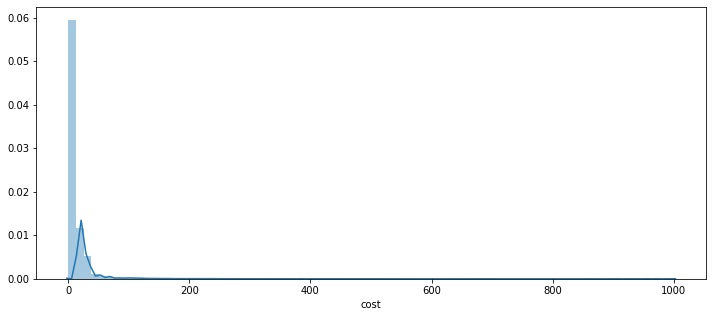

In [50]:
# Let's take a look at the cost feature first (i.e. y)
plt.figure(figsize=(12, 5))
sns.distplot(train.cost,bins=80, kde=True);

The distribution is right skewed.

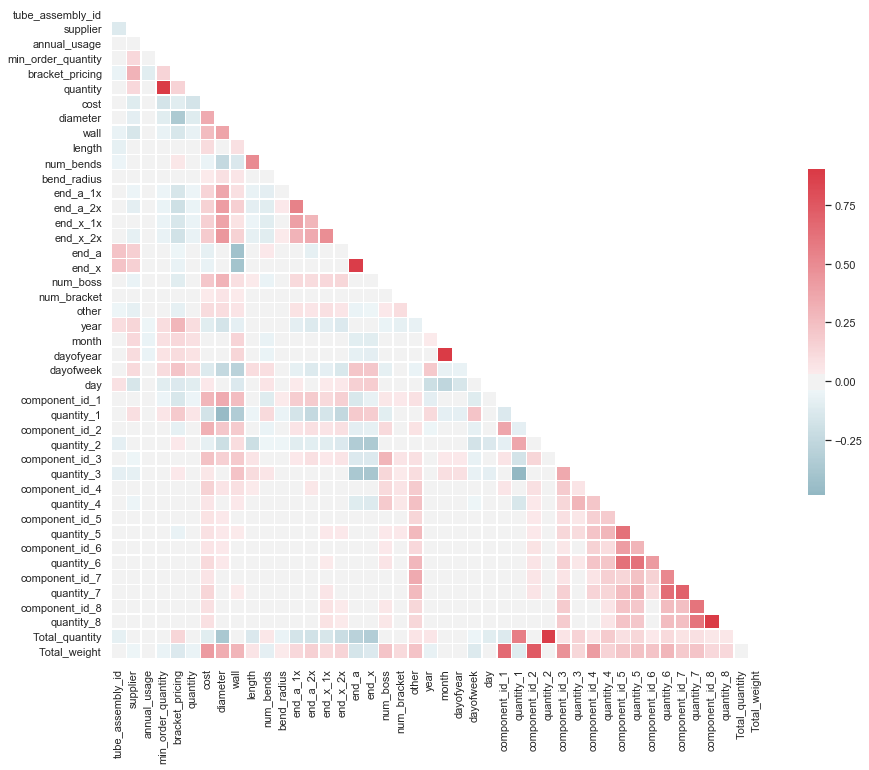

In [51]:
# Create a correlation heatmap
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
sns.set(style="white")
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

What can we tell from the above figure?

Let's pick up some significant features that relate to 'cost' and plot the pairplot.

D:\APPS\Conda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\APPS\Conda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


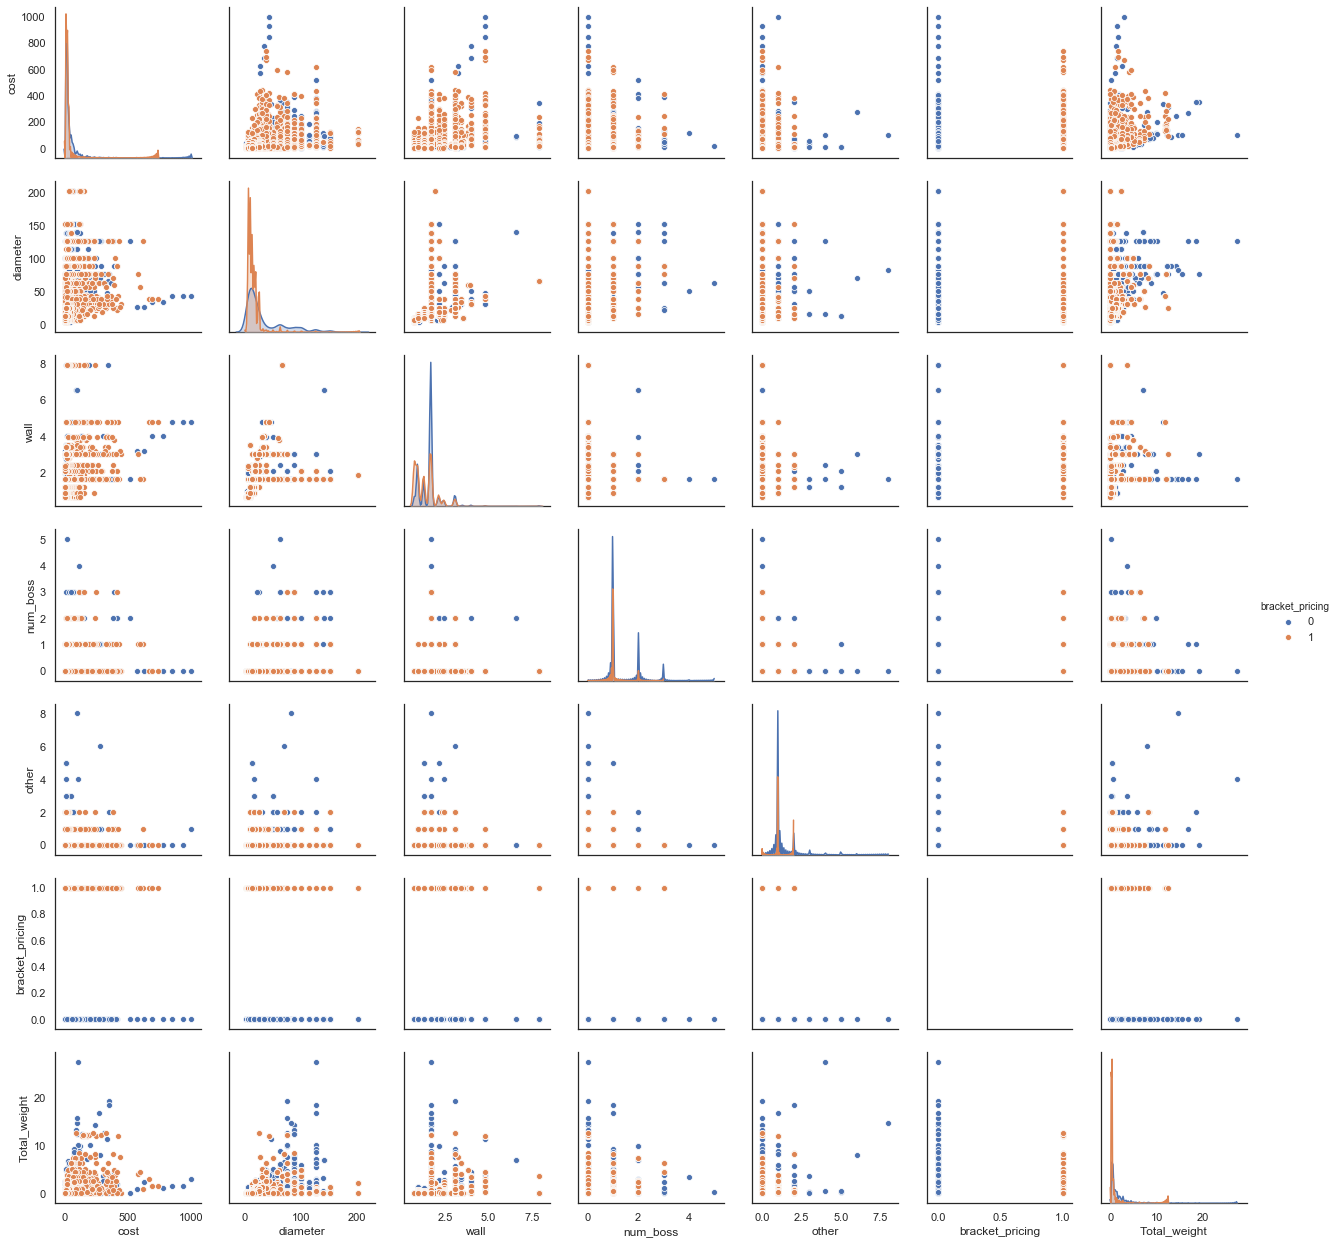

In [52]:
# Create pairplot with selected features
cols = ['cost', 'diameter', 'wall', 'num_boss',  
        'other', 'bracket_pricing', 'Total_weight']

data = train[cols]

sns.pairplot(data, hue='bracket_pricing' );

In [53]:
train.to_csv('trainfinal.csv')